## 09. 특성 '추출'(Feature Extraction)을 사용한 차원 축소
* 신규 특성을 가공한다
* 정보의 희생은 적게 하고, 특성의 수를 줄인다
* 사람의 눈으로는 해당 특성을 이해할 수 없다
    * 해석 가능하려면 = 특성 '선택'을 통한 차원 축소
    
      
### 목차  
* 주성분을 사용해 특성 줄이기 (선형적으로 구분됨)
* 선형적으로 구분되지 않은 데이터의 차원 축소하기
* 클래스 분리를 최대화하여 특성 줄이기
* 행렬 분해를 사용하여 특성 줄이기
* 희소한 데이터의 특성 줄이기

# 1. 주성분을 사용해 특성 줄이기 : sklearn PCA
### 샘플을 흩뿌린 상태에서 가장 분산이 많은 방향을 첫 번째 주성분이라고 한다. (그만큼 많은 데이터를 포괄)
PCA 클래스 객체 만들때 사용되는 변수 3가지  
* n_components : 해당 분산을 유지할 수 있는 최소한의 특성 개수 반환
* whiten = True : 표준화 ( 평균 0 분산 1 ) 
    * 특성들의 스케일을 맞추는 역할
    * default인 False로 설정하면, 평균은 0이지만 스케일은 맞춰지지 않음
* solver = 'randomized' : 확률적 알고리즘을 사용하여 시간을 단축시킴
    
* 주성분의 속성 = .components_
* 주성분 속성을 feature에 투영할 때 = np.dot(features, pca_nowhiten.components_.T)
* 주성분에 의해 설명된 분산 = .explained_variance_ratio_
    
* 적절한 분산 비율 선택하기
    * np.cumsum 으로 그래프 그리기
    * 단, 표준화하지 않은 원본 데이터를 사용해 올바른 분산을 구할 것

In [ ]:
#pip install rise

In [3]:
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.decomposition import PCA
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
digits = datasets.load_digits()

In [17]:
digits
#data, target, target_names, images

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

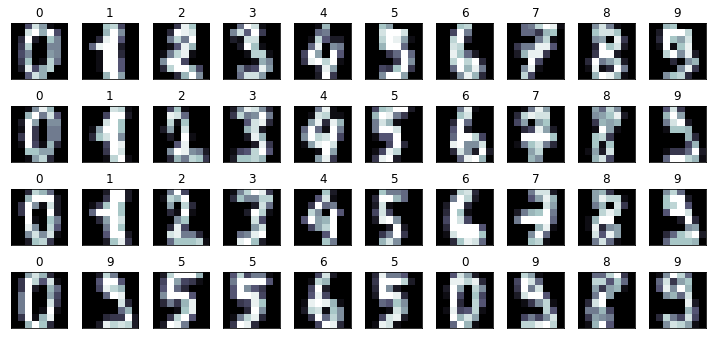

In [18]:
# 데이터셋 소개
print(digits.DESCR)
# import cv2
# from matplotlib import pyplot as plt
# plt.imshow(digits.images, cmap = 'gray')
# plt.show()
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [19]:
# 특성행렬 표준화
features = StandardScaler().fit_transform(digits.data)
features

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [20]:
# 99%의 분산을 유지하도록 PCA 클래스 객체를 만든다
pca = PCA(n_components = 0.99,  whiten = True)

# PCA 수행
features_pca = pca.fit_transform(features)

# 결과를 확인
print('원본 특성 개수:', features.shape[1])
print('줄어든 특성 개수:', features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


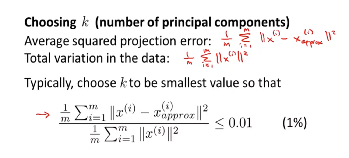

In [21]:
# 주성분 개수 선택하기
import cv2
data =  cv2.imread('/Users/yeonjin/Desktop/스크린샷 2020-05-09 오전 9.44.05.png')
data = cv2.resize(data, (1580, 680))
plt.imshow(data), plt.axis('off')
plt.show()

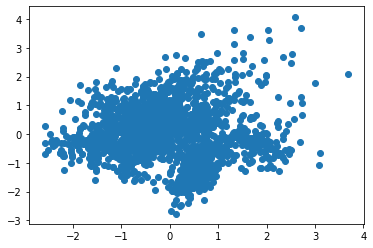

In [22]:
## 화이트닝 : 주성분에 투영된 특성의 스케일을 맞추는 역할
plt.scatter(features_pca[:,0], features_pca[:,1])
plt.show()

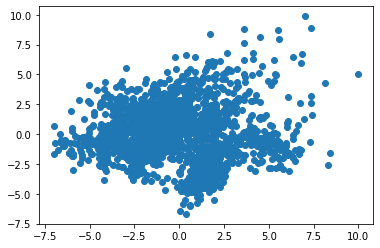

In [25]:
# 만약 whiten = False로 적용한다면? (default)
### 평균은 0이지만 scale은 맞춰지지 않는다
pca_nowhiten = PCA(n_components = 0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0], features_nowhiten[:,1])
plt.show()

In [29]:
pca_nowhiten.components_.shape
# 주성분 54개 속성은 .components_에 저장되어 있음
# 각 주성분은 원본의 특성공간에서 방향을 나타내므로, 벡터가 원본 크기만큼 (64개) 존재함

(54, 64)

In [30]:
# 특성행렬을 주성분에 투영하려면!
# allclose : 동일한지 여부 판단해주는 함수
np.allclose(
    features_nowhiten
    , np.dot(features, pca_nowhiten.components_.T)) #components_ 배열(pca속성)을 전치하여 점곱하기


True

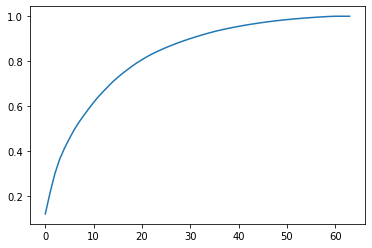

In [31]:
# 적절한 분산 비율 선택하기 : np.cumsum
# n_components 매개변수 미지정시 특성 개수만큼 주성분이 만들어짐...X
# 주성분에 의해 설명된 분산 = explained_variance_ratio_
pca = PCA(whiten = True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

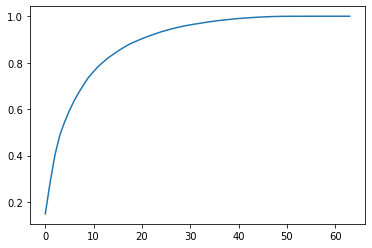

In [32]:
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## 9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기
### 커널 트릭을 사용하는 주성분 분석의 확장을 사용하여, 비선형 차원 축소 수행! 

* PCA는 특성 행렬의 차원을 축소할 수 있다
* 표준 PCA는 샘플을 선형적으로 투영하여 특성을 축소한다
    * 다른 클래스 사이에 직선이나, 초평면을 그릴 수 있다면 잘 동작한다
    * 그러나 구부러진 결정 경계를 사용해서만 클래스 구분이 가능하다면 선형 변환이 맞지 않는다.
* 커널 함수는 선형적으로 구분되지 않는 데이터를 선형적으로 구분되는 고차원으로 투영시켜 준다 = 커널트릭
* KernelPCA
    * kernel 매개변수 지정 
        * rbf : 가우시안 방사 기저 함수 커널
        * poly : 다항식 커널
        * sigmoid : 시그모이드 커널
        * liner : = 표준 PCA
        https://analysis-flood.tistory.com/95
     * 우선 선형으로 해본 후 rbf 한 뒤 그 다음은 선택
* kernel PCA는 분산을 선정하여 그에 맞는 주성분 개수를 구했지만, 지금은 불가함.
* 주성분의 개수를 선택해야 하며
* 커널 자체의 하이퍼파라미터값을 설정해줘야 함
    * 12장에서 최적값을 배우기로
* kernel pca는 실제 고차원으로 데이터를 변환하는 것은 아니지만, 고차원 데이터를 다루는듯한 효과를 낸다.
* 기타 매개변수들
    * gamma : rbf, poly, sigmoid에서 사용, default = 1 / 특성 개수
    * degree : poly 커널에 사용하는 거듭제곱 수, default = 3 (최고차항)
    * coef0 : poly, sigmoid, default = 1
    


In [37]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

In [39]:
features, _ = make_circles(n_samples = 100, random_state = 1 , noise = 0.1, factor = 0.1)
kpca = KernelPCA(kernel = 'rbf', gamma = 15, n_components = 1)
features_kpca = kpca.fit_transform(features)
print('원본 특성 개수:' , features.shape[1])
print('줄어든 특성 개수:', features_kpca.shape[1])


원본 특성 개수: 2
줄어든 특성 개수: 1


In [1]:
features_kpca

NameError: name 'features_kpca' is not defined